In [11]:
import json

# Open and load the JSON file
with open("results/logit_result.json", "r") as file:
    data = json.load(file)

# Print the entire JSON content
print(data["similarities"])


[[1.0, 0.9872729778289795, 0.9882638454437256, 0.9907819032669067, 0.9896050691604614, 0.9861159324645996, 0.9831470251083374, 0.9864009618759155, 0.9870749711990356, 0.9892988204956055, 0.990692138671875, 0.9903641939163208, 0.9905490875244141, 0.9904046058654785, 0.991972804069519, 0.992942214012146, 0.9937349557876587, 0.9935727119445801, 0.9935258030891418, 0.9934064149856567, 0.9922019243240356, 0.990807294845581, 0.9881324768066406, 0.9809821844100952, 0.8326034545898438], [0.9999999403953552, 0.9914095401763916, 0.9899159669876099, 0.991412878036499, 0.989790141582489, 0.9849735498428345, 0.9766309261322021, 0.9818769693374634, 0.9815229773521423, 0.9831570386886597, 0.9828804135322571, 0.9800739884376526, 0.983818531036377, 0.9860761165618896, 0.9873790740966797, 0.9883759021759033, 0.9888646006584167, 0.9887649416923523, 0.9885939359664917, 0.988120436668396, 0.9869417548179626, 0.9864911437034607, 0.9887745976448059, 0.9898260235786438, 0.9186858534812927], [1.0, 0.9910594820

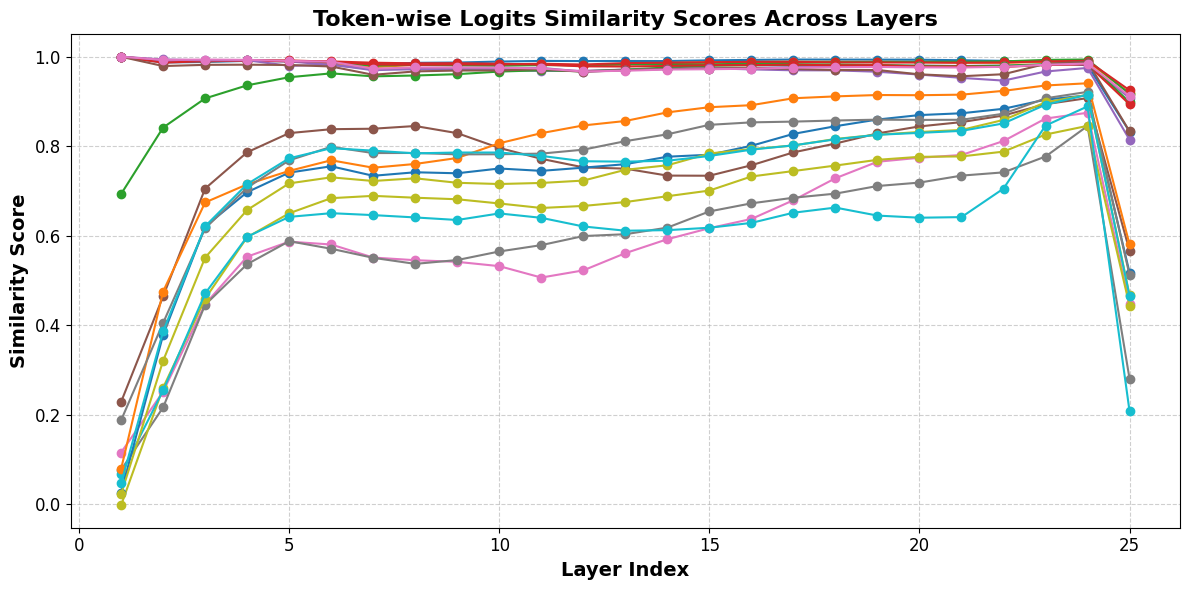

In [8]:
import matplotlib.pyplot as plt
import numpy as np

similarities = np.array(data["similarities"])
# Number of tokens and layers
num_tokens, num_layers = similarities.shape

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each token's similarity score across layers
for token_idx in range(num_tokens):
    plt.plot(range(1, num_layers + 1), similarities[token_idx], marker="o", linestyle="-", label=f"Token {token_idx+1}")

# Styling
plt.xlabel("Layer Index", fontsize=14, fontweight="bold")
plt.ylabel("Similarity Score", fontsize=14, fontweight="bold")
plt.title("Token-wise Logits Similarity Scores Across Layers", fontsize=16, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [54]:
import json

# Open and load the JSON file
with open("results/flores_results.json", "r") as file:
    flores_data = json.load(file)

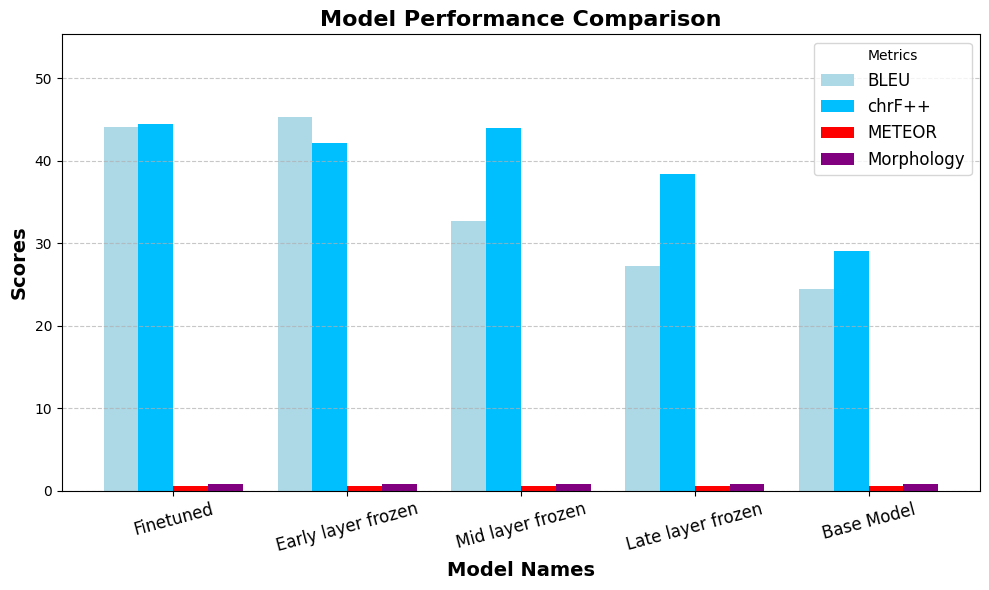

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
models = ["Finetuned", "Early layer frozen", "Mid layer frozen", "Late layer frozen", "Base Model"]  # Model names
numbers = [0,3,2,4,5]
for i in numbers:
    bleu_scores = [flores_data[i]["BLEU"] for i in numbers]
    chrf_scores = [flores_data[i]["chrF++"] for i in numbers]
    meteor_scores = [flores_data[i]["METEOR"] for i in numbers]
    morph_scores = [flores_data[i]["Morph"] for i in numbers]

# Define bar width and positions
x = np.arange(len(models))
bar_width = 0.2

# Create the bar plot
plt.figure(figsize=(10, 6))

plt.bar(x - 1.5 * bar_width, bleu_scores, width=bar_width, label="BLEU", color="lightblue")
plt.bar(x - 0.5 * bar_width, chrf_scores, width=bar_width, label="chrF++", color="deepskyblue")
plt.bar(x + 0.5 * bar_width, meteor_scores, width=bar_width, label="METEOR", color="r")
plt.bar(x + 1.5 * bar_width, morph_scores, width=bar_width, label="Morphology", color="purple")

# Formatting
plt.xlabel("Model Names", fontsize=14, fontweight="bold")
plt.ylabel("Scores", fontsize=14, fontweight="bold")
plt.title("Model Performance Comparison", fontsize=16, fontweight="bold")
plt.xticks(ticks=x, labels=models, fontsize=12, rotation=15)
plt.legend(fontsize=12, title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylim(0, max(bleu_scores) + 10)  # Adjust y-axis limit for better visibility

# Show the plot
plt.tight_layout()
plt.show()


In [56]:
import pandas as pd

# Extracting data into a structured format
data = {
    "Model": [models[i] for i in range(len(models))],
    "BLEU": [flores_data[i]["BLEU"] for i in numbers],
    "chrF++": [flores_data[i]["chrF++"] for i in numbers],
    "METEOR": [flores_data[i]["METEOR"] for i in numbers],
    "Morphology": [flores_data[i]["Morph"] for i in numbers]
}

# Creating a pandas DataFrame
df = pd.DataFrame(data)

In [57]:
df

,Model,BLEU,chrF++,METEOR,Morphology
0,Finetuned,44.058638,44.426093,0.537257,0.735178
1,Early layer frozen,45.298529,42.123201,0.548596,0.748849
2,Mid layer frozen,32.666948,43.944077,0.550242,0.751173
3,Late layer frozen,27.249745,38.391527,0.537745,0.741228
4,Base Model,24.446151,29.048680,0.556373,0.756099
